# The Sparks Foundation - Data Science & Business Analytics Internship

## Task-2 : Prediction using Unsupervised Machine Learning

In this task it is required to predict the optimum number of cluster for the iris dataset. Iris dataset consists of 3 types of flower namely Iris-setosa, Iris-versicolour and Iris-verginica.

## Author - Naisargi Patel

### Steps:

•	Step-1 : Importing the data

•	Step-2 : Exploring the data

•	Step-3 : Finding the optimum number of clusters

•	Step-4 : Applying KMeans clustering on the data

•	Step-5 : Visualizing the clusters

## STEP-1 : Importing the data

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# Loading the iris dataset

df = pd.read_csv('Iris.csv')
print('Dataset is imported successfully')

Dataset is imported successfully


In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## STEP-2 : Exploring the data

In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

So, We have not any missing values in the dataset

Now we will drop two columns which are Id and Species from the dataset

In [10]:
df.drop(columns=['Id','Species'], inplace=True, axis=1)

In [11]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## STEP-3 : Finding the optimum number of clusters

Before clustering the data using KMeans, we need to specify the number of clusters. In order to find the optimum number of 
clusters, there are various methods available like Silhoutte Coefficient and the Elbow method.
Here, We are using Elbow method for finding minimum number of clusters

### Brief about the Elbow method

In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square(wcss)
value is calculated and stored in a list. These values are then plotted against the range of number of clusters used before.

In [12]:
# Calculating the within-cluster sum of square

wcss = []
cluster_rng = range(1,15)
for k in cluster_rng:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    wcss.append(km.inertia_)

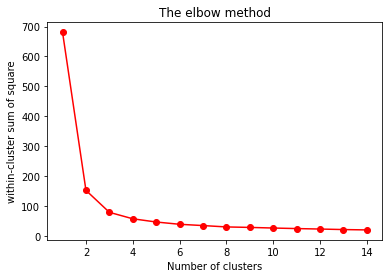

In [13]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(cluster_rng, wcss, 'ro-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

We can clearly see why it is called 'The Elbow method' from the above graph, the optimum number of cluster is where the elbow occurs. This is when the within-cluster sum of square(wcss) doesn't decrease significantly with every iteration.

So the optimum number of clusters = "3"

## STEP-4 : Applying KMean clustering on the data

In [14]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(df)

## STEP-5 : Visualizing the clusters

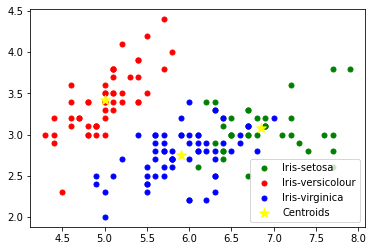

In [15]:
x = df.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions == 0,0], x[predictions == 0,1], s = 25, c='green', label = 'Iris-setosa')
plt.scatter(x[predictions == 1,0], x[predictions == 1,1], s = 25, c='red', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2,0], x[predictions == 2,1], s = 25, c='blue', label = 'Iris-virginica')

# Plotting the centroids

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 100, c = 'yellow',marker = '*', label = 'Centroids')
plt.legend()
plt.show()